# Knapsack problem using Genetic Algorithm

In [226]:
# import necessary libraries

import numpy as np
import operator
import random
import pandas as pd
import matplotlib.pyplot as plt

### Create necessary classes, functions and constants

In [194]:
MAX_CAPACITY = 15 # the maximum weight of the knapsack

ITEMS = [["Barraca", 150, 3.5],
         ["Saco de dormir", 100, 2.0],
         ["Isolante térmico", 50, 0.5],
         ["Colchão inflável", 80, 1.0],
         ["Lanterna", 30, 0.2],
         ["Kit de primeiros socorros", 20, 0.5],
         ["Repelente de insetos", 15, 0.1],
         ["Protetor solar", 20, 0.2],
         ["Canivete", 10, 0.1],
         ["Mapa e bússola", 25, 0.3],
         ["Garrafa de água", 15, 1.8],
         ["Filtro de água", 50, 0.5],
         ["Comida (ração liofilizada)", 50, 3.0],
         ["Fogão de camping", 70, 1.5],
         ["Botijão de gás", 30, 1.2],
         ["Prato, talheres e caneca", 20, 0.5],
         ["Roupas (conjunto)", 80, 1.5],
         ["Calçados (botas)", 120, 2.0],
         ["Toalha", 20, 0.5],
         ["Kit de higiene pessoal", 30, 0.5]]

NUM_ITEMS = len(ITEMS)

In [190]:
# define class to handle "items"

class Item:
    def __init__(self, name, price, weight):
        self.name = name
        self.price = price
        self.weight = weight

    def __repr__(self):
        return self.name + ": " + "R$ " + str(self.price) + " | Peso: " + str(self.weight) + " kg"

In [197]:
item_list = []

for item in ITEMS:
    name = item[0]
    price = item[1]
    weight = item[2]
    
    item_list.append(Item(name, price, weight))

In [217]:
# define fitness function

class Fitness:
    def __init__(self, knapsack):
        self.knapsack = knapsack
        self.fitness = 0.0

    def calculate_fitness(self):
        total_price = 0.0
        total_weight = 0.0

        for i in range(0, len(self.knapsack)):
            if self.knapsack[i] == 1: # if the item is picked up
                item = item_list[i]
                total_price += item.price
                total_weight += item.weight
        
        if total_weight > MAX_CAPACITY:
            self.fitness = 0.0
        else:
            self.fitness = total_price

        return self.fitness

In [199]:
# print informations about the knapsack

def print_knapsack(knapsack):
    total_price = 0.0
    total_weight = 0.0

    for i in range(0, len(knapsack)):
        if knapsack[i] == 1:
            item = item_list[i]
            total_price += item.price
            total_weight += item.weight
            print(item)

    print("\nValor da mochila (R$): R$ " + str(total_price))
    print("Peso da mochila (kg): " + str(round(total_weight, 2)) + " kg\n")

### Create our initial population

In [200]:
# create a solution

def create_knapsack():
    knapsack = [random.randint(0, 1) for _ in range(NUM_ITEMS)]
    return knapsack

In [201]:
#  generate initial population

def gen_initial_population(pop_size):
    population = [create_knapsack() for _ in range(pop_size)]

    return population

### Create the genetic algorithm

In [218]:
# rank the knapsacks based on the fitness value

def rank_knapsacks(population):
    fitness_results = {}

    for i in range(len(population)):
        fitness_results[i] = Fitness(population[i]).calculate_fitness()

    return sorted(fitness_results.items(), key=operator.itemgetter(1), reverse=True)

In [219]:
# select individuals through tournament method

def selection(population, tournament_size):
    parents = []

    # randomly select some individuals
    selected = random.sample(population, tournament_size*2)
    
    first_tournament = selected[:tournament_size]
    second_tournament = selected[tournament_size:]

    first_winner = first_tournament[0]
    second_winner = second_tournament[0]

    for i in range(1, tournament_size):
        if Fitness(first_tournament[i]).calculate_fitness() > Fitness(first_winner).calculate_fitness():
            first_winner = first_tournament[i]

        if Fitness(second_tournament[i]).calculate_fitness() > Fitness(second_winner).calculate_fitness():
            second_winner = second_tournament[i]

    parents.append(first_winner)
    parents.append(second_winner)

    return parents

In [210]:
# crossover generates 2 children based on parent's parts

def crossover(parents, crossover_rate):
    children = parents

    if random.random() < crossover_rate:
        child_1 = parents[0][:NUM_ITEMS//2] + parents[1][NUM_ITEMS//2:]
        child_2 = parents[0][NUM_ITEMS//2:] + parents[1][:NUM_ITEMS//2]
        children = [child_1, child_2]

    return children

In [207]:
# mutation changes an individual by switching its bit

def mutate(individuals, mutation_rate):
    for individual in individuals:
        if random.random() < mutation_rate:
            pos = random.randint(0, NUM_ITEMS-1)
            individual[pos] = 1 if individual[pos] == 0 else 0

    return individuals

In [211]:
# create a generation by applying the genetic operators

def next_generation(current_gen, hyperparams):
    next_gen = []
    
    while len(next_gen) < len(current_gen):
        children = []

        # get parents from tournament selection
        parents = selection(current_gen, hyperparams["tournament_size"])
        
        if random.random() < hyperparams["reprodution_rate"]:
            children = parents
        else:
            # crossover
            children = crossover(parents, hyperparams["crossover_rate"])

            # mutation
            children = mutate(children, hyperparams["mutation_rate"])

        next_gen.extend(children)

    return next_gen[:len(current_gen)]

In [229]:
def genetic_algorithm(hyperparams):
    population = gen_initial_population(hyperparams["pop_size"])
    
    ranked_knapsacks = rank_knapsacks(population)
    best_knapsack_index = ranked_knapsacks[0][0]
    print("MOCHILA INICIAL:\n")
    print_knapsack(population[best_knapsack_index])

    progress = []
    progress.append(1/rank_knapsacks(population)[0][1])

    for _ in range(hyperparams["generations"]):
        population = next_generation(population, hyperparams)
        progress.append(1/rank_knapsacks(population)[0][1])

    ranked_knapsacks = rank_knapsacks(population)
    best_knapsack_index = ranked_knapsacks[0][0]
    print("MOCHILA FINAL:\n")
    print_knapsack(population[best_knapsack_index])

    plt.plot(progress)
    plt.ylabel('1/Price')
    plt.xlabel('Generation')
    plt.show()

### Running the genetic algorithm

MOCHILA INICIAL:

Barraca: R$ 150 | Peso: 3.5 kg
Saco de dormir: R$ 100 | Peso: 2.0 kg
Isolante térmico: R$ 50 | Peso: 0.5 kg
Colchão inflável: R$ 80 | Peso: 1.0 kg
Lanterna: R$ 30 | Peso: 0.2 kg
Kit de primeiros socorros: R$ 20 | Peso: 0.5 kg
Repelente de insetos: R$ 15 | Peso: 0.1 kg
Filtro de água: R$ 50 | Peso: 0.5 kg
Fogão de camping: R$ 70 | Peso: 1.5 kg
Botijão de gás: R$ 30 | Peso: 1.2 kg
Calçados (botas): R$ 120 | Peso: 2.0 kg
Kit de higiene pessoal: R$ 30 | Peso: 0.5 kg

Valor da mochila (R$): R$ 745.0
Peso da mochila (kg): 13.5 kg

MOCHILA FINAL:

Barraca: R$ 150 | Peso: 3.5 kg
Saco de dormir: R$ 100 | Peso: 2.0 kg
Isolante térmico: R$ 50 | Peso: 0.5 kg
Colchão inflável: R$ 80 | Peso: 1.0 kg
Lanterna: R$ 30 | Peso: 0.2 kg
Repelente de insetos: R$ 15 | Peso: 0.1 kg
Protetor solar: R$ 20 | Peso: 0.2 kg
Mapa e bússola: R$ 25 | Peso: 0.3 kg
Filtro de água: R$ 50 | Peso: 0.5 kg
Fogão de camping: R$ 70 | Peso: 1.5 kg
Botijão de gás: R$ 30 | Peso: 1.2 kg
Roupas (conjunto): R$ 80 | 

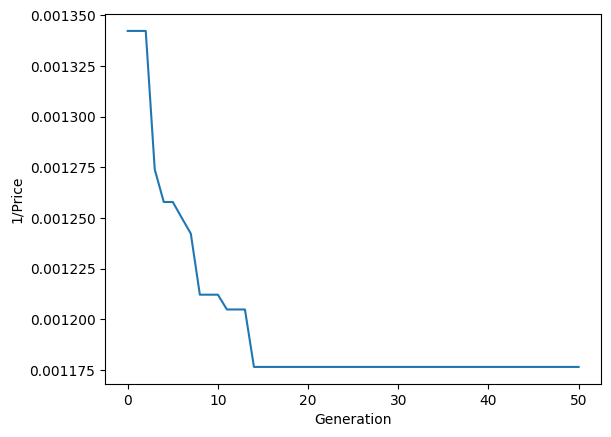

In [237]:
hyperparams = {
    "pop_size": 100,
    "tournament_size": 3,
    "reprodution_rate": 0.3,
    "crossover_rate": 0.4,
    "mutation_rate": 0.02,
    "generations": 50
}

genetic_algorithm(hyperparams=hyperparams)